# Regresión Logística

### Red Neuronal Multicapa (MLP)



In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix


from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import regularizers



In [2]:
N=1000
semilla1 = 23

noisy_data = sklearn.datasets.make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=5.0, random_state=semilla1)
#noisy_data = sklearn.datasets.make_moons(n_samples=N, noise=.40, random_state=semilla1) 
#noisy_data = sklearn.datasets.make_gaussian_quantiles(n_samples=N, n_features=2, n_classes=2, random_state=semilla1)  
#noisy_data = sklearn.datasets.make_circles(n_samples=N, noise=.10, random_state=semilla1, factor=0.1)  

In [3]:
X, Y = noisy_data
Y = Y.reshape(Y.shape[0],1)

In [4]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000, 1)


In [5]:
print(X[0:6,:])

[[  0.81901591   2.66053355]
 [  0.16565773  -5.66478788]
 [ -2.50782933   8.70470467]
 [  4.41056129  -8.27885686]
 [ 10.59864583 -10.51814747]
 [ -0.79583786  -3.31752817]]


In [6]:
print(Y[0:6,0])

[1 1 0 1 1 1]


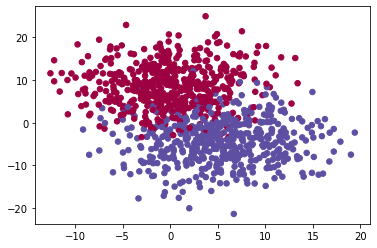

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Spectral);

### Para este problema la mejor configuración que es generalizable y plantea el mayor reto es 33%/33%/33%:

In [15]:
semilla2 = 17
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=.60, random_state=semilla2)        
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=.5, random_state=semilla2)  

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(400, 2)
(400, 1)
(300, 2)
(300, 1)
(300, 2)
(300, 1)


In [17]:
n_epochs = 10   
n_neurons = 5
#n_neurons2 =

In [18]:
model = Sequential()

model.add( Dense(units = n_neurons, input_dim=2, activation='tanh') )   # primera capa oculta
#model.add( Dense(units = n_neurons2, activation='sigmoid') )   # segunda capa oculta

model.add( Dense(1, activation='sigmoid') )   # capa de salida

model.compile(optimizer='sgd',    # método de optimización para minimizar el costo 
              loss='binary_crossentropy',   # función de costo
              metrics=['accuracy'])   # métrica para evaluar el desempeño del modelo

In [19]:
H = model.fit(x=X_train, y=Y_train, epochs=n_epochs, validation_data=(X_val, Y_val))

Epoch 1/10
13/13 [==============================] - 1s 26ms/step - loss: 0.3148 - accuracy: 0.9225 - val_loss: 0.2942 - val_accuracy: 0.9267
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3200 - accuracy: 0.9076 - val_loss: 0.2854 - val_accuracy: 0.9267
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3120 - accuracy: 0.9037 - val_loss: 0.2785 - val_accuracy: 0.9267
Epoch 4/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3046 - accuracy: 0.9032 - val_loss: 0.2725 - val_accuracy: 0.9300
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3011 - accuracy: 0.9044 - val_loss: 0.2675 - val_accuracy: 0.9300
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2967 - accuracy: 0.9031 - val_loss: 0.2629 - val_accuracy: 0.9267
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3038 - accuracy: 0.8971 - val_loss: 0.2589 - val_accuracy: 0.9267
Epoch 8/10
13/13 [=

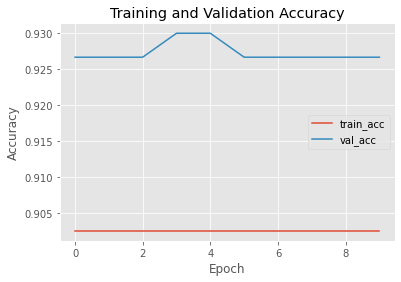

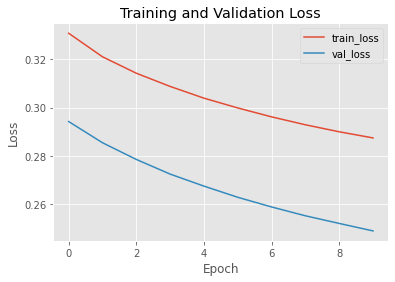

In [20]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss") 
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [21]:
print("Valdiation_Accuracy: {:.4}".format(H.history["val_accuracy"][n_epochs-1]))  # Es el último de la corrida anterior,
                                                                                   # pero lo ponemos a manera de resumen.

Valdiation_Accuracy: 0.9267


In [22]:
predictions = np.round(model.predict(X_test))

cm = confusion_matrix(Y_test, predictions)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("\nTest_Accuracy: {:.4f}".format(acc))


[[150   9]
 [ 12 129]]

Test_Accuracy: 0.9300


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
